In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import math

2021-10-04 05:30:04.670141: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
os.listdir('../input/hotel-id-2021-fgvc8')

['sample_submission.csv', 'train_images', 'train.csv', 'test_images']

In [ ]:
df = pd.read_csv('../input/hotel-id-2021-fgvc8/train.csv')
df.head()

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


In [ ]:
train_images ='../input/hotel-id-2021-fgvc8/train_images/'

In [ ]:
df['train_images']= train_images + df.chain.astype(str) +'/'+ df.image
df.head()

,image,chain,hotel_id,timestamp,train_images
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,../input/hotel-id-2021-fgvc8/train_images/85/8...
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,../input/hotel-id-2021-fgvc8/train_images/6/80...
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,../input/hotel-id-2021-fgvc8/train_images/3/80...
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31,../input/hotel-id-2021-fgvc8/train_images/5/80...
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22,../input/hotel-id-2021-fgvc8/train_images/0/80...


In [ ]:
df_dash = df[:100]
df_dash.head()

,image,chain,hotel_id,timestamp,train_images
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,../input/hotel-id-2021-fgvc8/train_images/85/8...
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,../input/hotel-id-2021-fgvc8/train_images/6/80...
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,../input/hotel-id-2021-fgvc8/train_images/3/80...
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31,../input/hotel-id-2021-fgvc8/train_images/5/80...
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22,../input/hotel-id-2021-fgvc8/train_images/0/80...


In [ ]:
df_dash.shape

(100, 5)

print random images to see that my train images is showing or not

In [ ]:
# import required libraries
import random
from IPython.core.display import Image
from IPython.display import display

../input/hotel-id-2021-fgvc8/train_images/5/91ab916a2cbbcea4.jpg


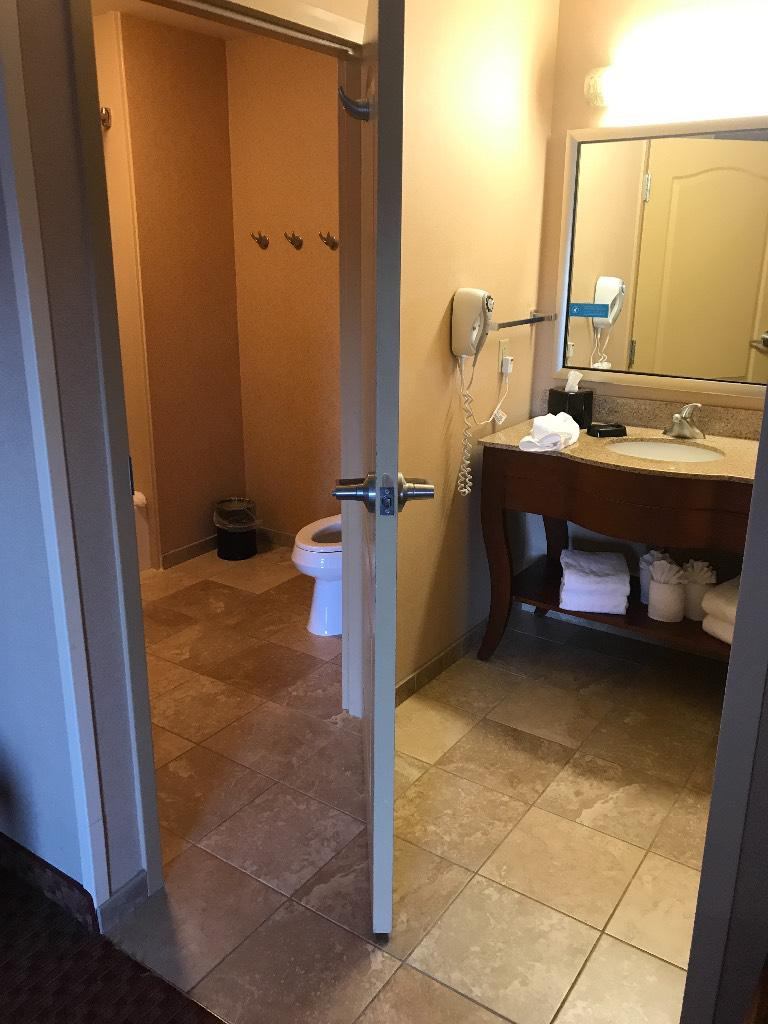



../input/hotel-id-2021-fgvc8/train_images/37/9190fc656f067e68.jpg


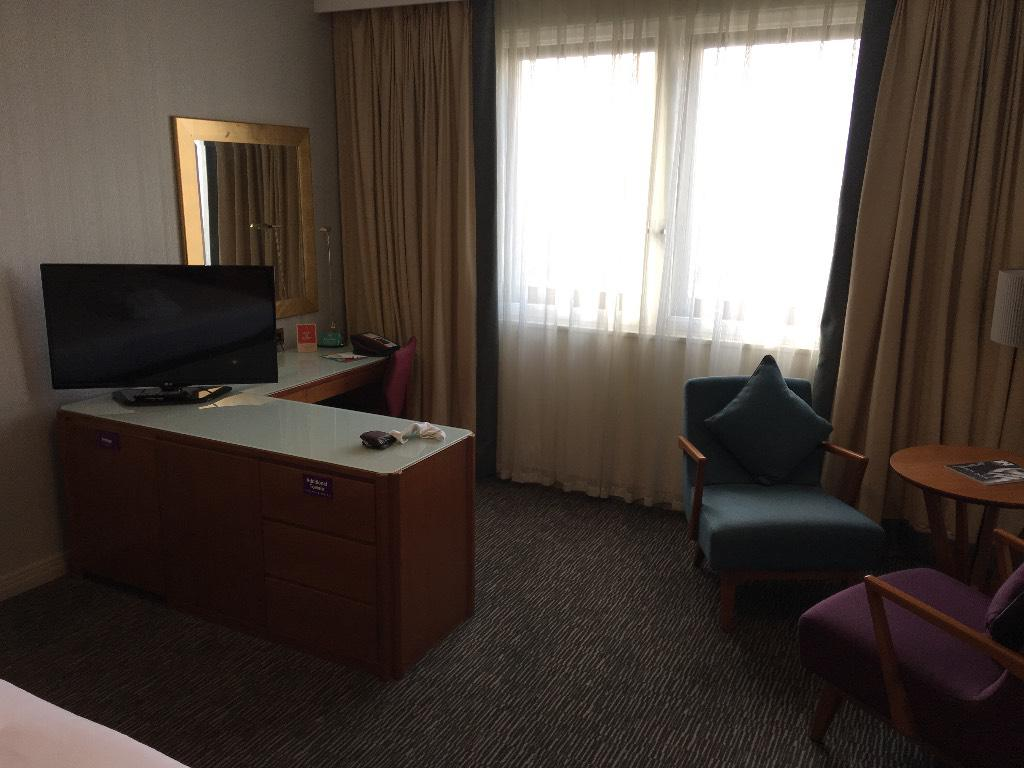



../input/hotel-id-2021-fgvc8/train_images/87/a7eb6141078ff2d0.jpg


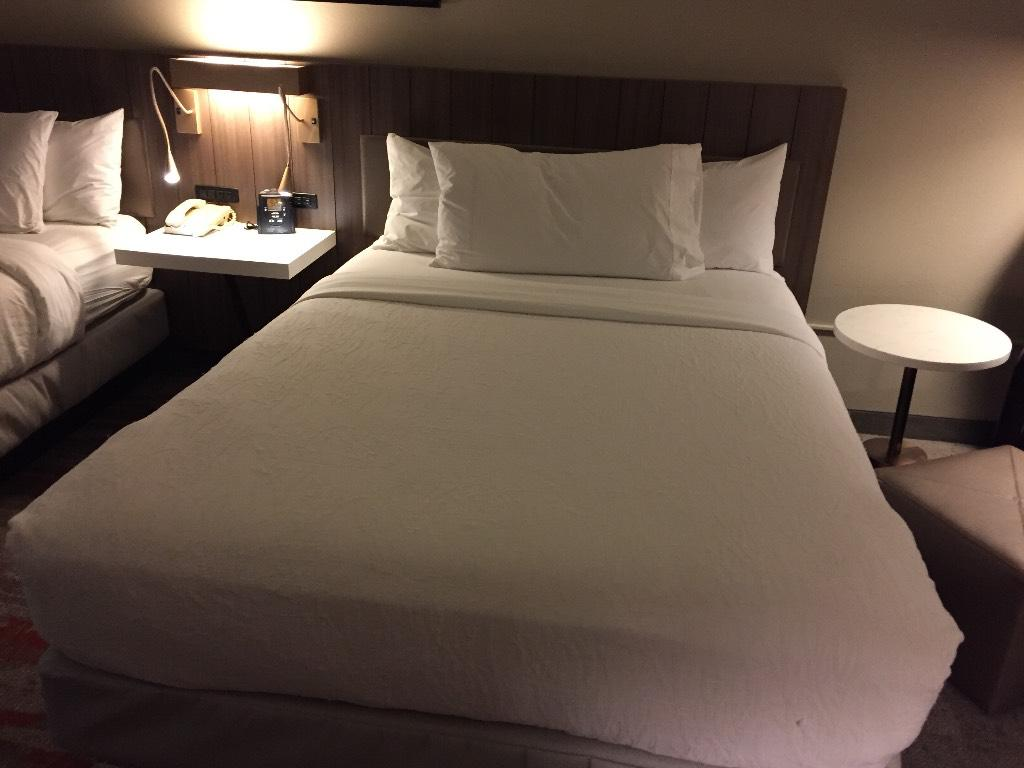

In [ ]:
for n in range(3):
    tr_image = random.choice(list(df['train_images']))
    print(tr_image)
    display(Image(tr_image,width=400,height=400))
    print('\n')

In [ ]:
def train_images_reading(path,labels):
    
    images = tf.io.read_file(path)
    
    images = tf.image.decode_jpeg(images, channels=3)
    
    images = tf.image.resize(images, [64,64])
    
    images = tf.cast(images, tf.float32)
    
    images /= 255.0
    
    return(images,labels)

In [ ]:
# data augmentation techniques on image used from this colab file 
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb
def train_images_preprocessing(images, labels):
    
    images = tf.image.stateless_random_flip_left_right(images,seed=(12,10))
    
    images = tf.image.stateless_random_flip_up_down(images,seed=(12,10))
    
    images = tf.image.rot90(images)
    
    images = tf.image.stateless_random_brightness(images, max_delta=16.0 / 255.0,seed=(12,10))
    
    images = tf.image.stateless_random_saturation(images, lower=0.8, upper=1.3,seed=(12,10))
    
    images = tf.image.stateless_random_hue(images, 0.2,seed=(12,10))

    #Make sure the image is still in [0, 1]
    images = tf.clip_by_value(images, 0.0, 1.0)

    return (images, labels) , labels

In [ ]:
# import library for performing Label Encoding on hotel ids
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
df['hotel_id'] = labelencoder.fit_transform(df['hotel_id'])

In [ ]:
labelencoder.classes_

array([   12,    24,    44, ..., 65497, 65521, 65527])

In [ ]:
import pickle

In [ ]:
le_path = 'labelencoder.pkl'
with open(le_path, 'wb') as fw:
    pickle.dump(labelencoder, fw)

In [ ]:
label_ids = tf.convert_to_tensor(np.array(df['hotel_id']), dtype=tf.int32)
image_files  = tf.convert_to_tensor(df['train_images'].tolist(), dtype=tf.string)

2021-10-04 05:30:12.221281: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-04 05:30:12.224399: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-04 05:30:12.261809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 05:30:12.262482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-04 05:30:12.262555: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-04 05:30:12.287755: I tensorflow/stream_executor/platform/def

In [ ]:
len(label_ids)

97556

In [ ]:
# Create a train dataset
#https://udibhaskar.github.io/practical-ml/debugging%20nn/neural%20network/overfit/underfit/2020/02/03/Effective_Training_and_Debugging_of_a_Neural_Networks.html
train_dataset = tf.data.Dataset.from_tensor_slices((image_files, label_ids))

train_dataset = train_dataset.shuffle(len(image_files))

#this map fucntion is also taken from 
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb
train_dataset = train_dataset.map(train_images_reading,num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.map(train_images_preprocessing,num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.batch(64)
train_dataset = train_dataset.prefetch(2)

In [ ]:
train_dataset

<PrefetchDataset shapes: (((None, 64, 64, 3), (None,)), (None,)), types: ((tf.float32, tf.int32), tf.int32)>

In [ ]:
for input_text, output_label in train_dataset:
    print(input_text[0:3], output_label[0:3])
    break

2021-10-04 05:30:14.868630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-04 05:30:14.873987: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000189999 Hz


(<tf.Tensor: shape=(64, 64, 64, 3), dtype=float32, numpy=
array([[[[1.        , 0.99219984, 0.90857726],
         [1.        , 0.9774939 , 0.8938713 ],
         [1.        , 0.9872979 , 0.9036753 ],
         ...,
         [0.5549516 , 0.54660225, 0.3661821 ],
         [0.57259864, 0.5624066 , 0.38893104],
         [0.54514766, 0.52156174, 0.3844385 ]],

        [[1.        , 1.        , 0.92564374],
         [1.        , 1.        , 0.9136791 ],
         [1.        , 0.99467856, 0.9077968 ],
         ...,
         [0.59514767, 0.5733353 , 0.4012763 ],
         [0.58632416, 0.5645118 , 0.39245278],
         [0.5706379 , 0.5488255 , 0.3767665 ]],

        [[1.        , 1.        , 0.95270455],
         [1.        , 1.        , 0.9264242 ],
         [1.        , 1.        , 0.9166203 ],
         ...,
         [0.60103005, 0.5792177 , 0.40715867],
         [0.5912261 , 0.5694137 , 0.39735472],
         [0.5804418 , 0.5586294 , 0.3865704 ]],

        ...,

        [[1.        , 1.        , 

In [ ]:
len(train_dataset)

1525

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Input
from tensorflow.keras.applications import ResNet50

In [ ]:
num_classes=len(set(df['hotel_id'].values))

In [ ]:
#import keras
from tensorflow.keras.layers import SpatialDropout1D, LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Reshape

In [ ]:

x = inputs = Input(shape=(64,64,3,), name='input_image')


x = ResNet50(include_top=False,weights='imagenet')(x)

x = tf.keras.layers.BatchNormalization()(x)


x = Dropout(rate=0.5)(x)


x = Flatten()(x)


x = Dense(64, kernel_regularizer=tf.keras.regularizers.l2(5e-4))(x)


output = Dense(num_classes, activation="softmax")(x)

labels = Input([], name='label')

model = Model(inputs=[inputs,labels] ,outputs=output)



94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
resnet50 (Functional)           (None, None, None, 2 23587712    input_image[0][0]                
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2, 2, 2048)   8192        resnet50[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2, 2, 2048)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
learning_rate = tf.constant(0.001)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True, clipvalue=0.5)

In [ ]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
import datetime
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
#create a directory to save logs during model training
log_dir="./model_logs_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


#create a tensorboard callback with the log directory path
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,
                                                      write_graph=True,write_grads=True)
filepath="./weights_model_1.best.h5" 
check = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only = True, verbose = True,monitor='val_loss', mode="min")

callback_list = [tensorboard_callback, check]

2021-10-04 05:30:21.169946: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-10-04 05:30:21.169994: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-10-04 05:30:21.170033: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2021-10-04 05:30:21.190617: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.11.0
2021-10-04 05:30:21.332681: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-10-04 05:30:21.333085: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


In [ ]:
history = model.fit(train_dataset,epochs=10,verbose=1,callbacks=[callback_list])

Epoch 1/10


2021-10-04 05:30:26.895181: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-04 05:30:27.714130: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-04 05:30:28.605731: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


   1/1525 [..............................] - ETA: 5:26:21 - loss: 9.0286

2021-10-04 05:30:34.911263: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-10-04 05:30:34.911332: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   4/1525 [..............................] - ETA: 13:45 - loss: 9.0558

2021-10-04 05:30:35.620815: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-10-04 05:30:35.622803: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2021-10-04 05:30:35.775375: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 2052 callback api events and 2044 activity events. 
2021-10-04 05:30:35.881403: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-10-04 05:30:35.968574: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./model_logs_20211004-053021/train/plugins/profile/2021_10_04_05_30_35
2021-10-04 05:30:36.025690: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./model_logs_20211004-053021/train/plugins/profile/2021_10_04_05_30_35/d3a962c3f3d5.trace.json.gz
2021-10-04 05:30:36.131331: I tensorflow/core/profiler/rpc/client/save_pr

1525/1525 [==============================] - 1774s 1s/step - loss: 9.0491
Epoch 2/10
1525/1525 [==============================] - 1546s 1s/step - loss: 8.8959
Epoch 3/10
1525/1525 [==============================] - 1571s 1s/step - loss: 8.5972
Epoch 4/10
1525/1525 [==============================] - 1647s 1s/step - loss: 8.2697
Epoch 5/10
1525/1525 [==============================] - 1633s 1s/step - loss: 7.8476
Epoch 6/10
1525/1525 [==============================] - 1606s 1s/step - loss: 7.3148
Epoch 7/10
1525/1525 [==============================] - 1602s 1s/step - loss: 6.7299
Epoch 8/10
1525/1525 [==============================] - 1618s 1s/step - loss: 6.0839
Epoch 9/10
1525/1525 [==============================] - 1644s 1s/step - loss: 5.4257
Epoch 10/10
1525/1525 [==============================] - 1665s 1s/step - loss: 4.7829


In [ ]:
from matplotlib import pyplot
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    #pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.show()
    # plot accuracy
    #pyplot.subplot(212)
    #pyplot.title('Classification Accuracy')
    #pyplot.plot(history.history['accuracy'], color='blue', label='train')
    #pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    #pyplot.show()

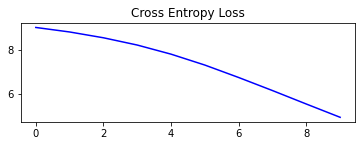

In [ ]:
summarize_diagnostics(history)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir .

In [ ]:
%load_ext tensorboard
%tensorboard --logdir example_tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import pickle

In [ ]:
model.save_weights("./weights_1_seq_model.h5")

In [ ]:
model.load_weights("../input/weight/weights_seq_model.h5")

In [ ]:
model.save('./model_saved')

2021-10-04 10:04:06.408609: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [ ]:
model_1 = tf.keras.models.load_model('./model_saved', compile=False)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
resnet50 (Functional)           (None, None, None, 2 23587712    input_image[0][0]                
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2, 2, 2048)   8192        resnet50[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2, 2, 2048)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model_test = Model(model_1.input[0],model_1.layers[5].output)

In [ ]:
def image_reading(file):
    
    
    image = tf.io.read_file(file)
    
    image = tf.image.decode_jpeg(image, channels=3)
    
    
    image = tf.image.resize(image, [64,64])
    
    
    image = tf.cast(image, tf.float32)
    
    image /= 255.0
    
    
    return image

In [ ]:
test_image = np.expand_dims(image_reading('../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg'),0)

In [ ]:
model_test.save('./test_model')

In [ ]:
test_model = tf.keras.models.load_model('./test_model', compile=False)

In [ ]:
#https://heartbeat.comet.ml/training-an-image-classification-model-for-mobile-using-tensorflow-lite-5ad9537841e6
tflite_converter = tf.lite.TFLiteConverter.from_saved_model('./test_model') 
tflite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tflite_converter.convert()

with open('./test_model_tflite', 'wb') as f:
    f.write(tflite_model)

2021-10-04 10:06:29.512807: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-10-04 10:06:29.512870: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-10-04 10:06:29.512885: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:325] Ignored change_concat_input_ranges.
2021-10-04 10:06:29.515351: I tensorflow/cc/saved_model/reader.cc:32] Reading SavedModel from: ./test_model
2021-10-04 10:06:29.587103: I tensorflow/cc/saved_model/reader.cc:55] Reading meta graph with tags { serve }
2021-10-04 10:06:29.587158: I tensorflow/cc/saved_model/reader.cc:93] Reading SavedModel debug info (if present) from: ./test_model
2021-10-04 10:06:29.587946: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-04 10:06:29.587991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor 

In [ ]:
tflite_test_model = tf.lite.Interpreter('./test_model_tflite')

In [ ]:
tflite_test_model.allocate_tensors()

In [ ]:
details_input = tflite_test_model.get_input_details()
details_output = tflite_test_model.get_output_details()

In [ ]:
tflite_test_model.set_tensor(details_input[0]['index'], test_image)

In [ ]:
tflite_test_model.invoke()

In [ ]:
test_embeddings = tflite_test_model.get_tensor(details_output[0]['index'])
print(test_embeddings)

[[ -6.3154993    4.0402455  -12.650174    -2.9327612   -5.105813
    5.383431    -3.6759338  -13.737408     5.3012576   -8.882378
   -3.8132398    2.9085405    0.84902763  -0.90787244   2.8945603
    0.16859293  -0.2002405    0.6411116    5.9615583   -0.6896784
   -3.4832673    7.1493015    6.5911865   -3.4217267  -10.49438
   10.153185    -1.8835742    0.24248242  -0.95340574   2.434887
    4.9138045    5.2347183    4.0901303    1.737188    11.43109
    0.20255864   2.110139     2.8917382   -0.5788465    2.745613
   -5.749248    10.402894     0.25719786   1.6897717   -2.5914237
   -5.3450727   -4.882663     3.0223856    2.141481    -9.602221
  -13.634017    -7.885146    -1.7958091    2.0522487   -2.6905704
   -6.184169     9.743035   -18.533894     1.1367321   -1.1233654
   12.598335     0.8579635    7.6399336   -1.0603817 ]]


In [ ]:
norm = np.linalg.norm(test_embeddings, axis=1, keepdims=True)
test_embeddings = test_embeddings / norm
test_embeddings

array([[-0.12647577,  0.08091097, -0.25333557, -0.05873221, -0.10225029,
         0.10780994, -0.07361517, -0.27510875,  0.10616431, -0.17788072,
        -0.0763649 ,  0.05824716,  0.01700284, -0.01818128,  0.05796719,
         0.00337628, -0.00401007,  0.01283906,  0.11938766, -0.01381167,
        -0.06975678,  0.14317371,  0.13199675, -0.06852435, -0.21016309,
         0.20333022, -0.03772093,  0.00485601, -0.01909314,  0.04876165,
         0.09840508,  0.10483178,  0.08190998,  0.03478936,  0.22892188,
         0.00405649,  0.04225817,  0.05791067, -0.01159213,  0.05498433,
        -0.11513588,  0.20833096,  0.00515071,  0.03383979, -0.0518965 ,
        -0.10704177, -0.09778143,  0.06052705,  0.04288583, -0.19229648,
        -0.27303824, -0.15790991, -0.03596332,  0.04109885, -0.05388204,
        -0.12384571,  0.19511646, -0.37116438,  0.02276448, -0.0224968 ,
         0.25229743,  0.01718179,  0.15299922, -0.02123547]],
      dtype=float32)

In [ ]:
df_train = pd.read_csv('../input/hotel-id-2021-fgvc8/train.csv')

In [ ]:
df_train['train_images']= train_images + df_train.chain.astype(str) +'/'+ df_train.image
df_train.head()

,image,chain,hotel_id,timestamp,train_images
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,../input/hotel-id-2021-fgvc8/train_images/85/8...
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,../input/hotel-id-2021-fgvc8/train_images/6/80...
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,../input/hotel-id-2021-fgvc8/train_images/3/80...
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31,../input/hotel-id-2021-fgvc8/train_images/5/80...
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22,../input/hotel-id-2021-fgvc8/train_images/0/80...


In [ ]:
train_filenames  = tf.convert_to_tensor(df_train['train_images'].tolist(), dtype=tf.string)

train_dataset = tf.data.Dataset.from_tensor_slices(train_filenames)

train_dataset = train_dataset.shuffle(len(train_filenames))


train_dataset = train_dataset.map(image_reading,num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.batch(64)
train_dataset = train_dataset.prefetch(2)

train_dataset

<PrefetchDataset shapes: (None, 64, 64, 3), types: tf.float32>

In [ ]:
train_embeddings = test_model.predict(train_dataset)

In [ ]:
train_embeddings.shape

(97556, 64)

In [ ]:
# normalize the embeddings
norm = np.linalg.norm(train_embeddings, axis=1, keepdims=True)
train_embeddings = train_embeddings / norm
train_embeddings

array([[-0.08717716,  0.10762264, -0.08680208, ..., -0.18619509,
         0.12556565,  0.23081702],
       [-0.03892954,  0.03222516, -0.02563981, ...,  0.06427424,
         0.09676638,  0.06083726],
       [-0.01809447, -0.07291162, -0.25887305, ..., -0.14092551,
         0.09355071,  0.13503385],
       ...,
       [-0.04930647,  0.00385415, -0.05029519, ...,  0.03530377,
        -0.01853118, -0.03576062],
       [-0.25105855, -0.01500414, -0.19516179, ..., -0.02756481,
         0.09632821,  0.04732309],
       [ 0.15760368, -0.1675404 , -0.2366659 , ...,  0.02785187,
        -0.02232282,  0.23777321]], dtype=float32)

In [ ]:
np.save('./train_embeddings.npy',train_embeddings)

In [ ]:
pip install faiss-cpu

     |████████████████████████████████| 8.4 MB 601 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import faiss

In [ ]:
train_embeddings = np.load('./train_embeddings.npy')

In [ ]:
#https://github.com/facebookresearch/faiss/wiki/Faiss-building-blocks:-clustering,-PCA,-quantization
#https://towardsdatascience.com/understanding-faiss-619bb6db2d1a
#https://www.programcreek.com/python/example/112284/faiss.Clustering
dim = train_embeddings.shape[1]
n_centroids = 7770
n_iter = 20
verbose = True

In [ ]:
kmeans = faiss.Kmeans(dim, n_centroids, niter=n_iter, verbose=verbose)
kmeans.train(train_embeddings)

WARNING clustering 97556 points to 7770 centroids: please provide at least 303030 training points


Clustering 97556 points in 64D to 7770 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s


21634.09765625

In [ ]:
# the error after training for n iterations
kmeans.obj[-1]

21634.09765625

In [ ]:
with open("./kmeans_error.pkl", "wb") as f:
    pickle.dump(kmeans.obj[-1], f)

In [ ]:
centroid_train_distance, centroid_train_index = kmeans.index.search(train_embeddings, 1)

In [ ]:
centroid_train_distance.shape

(97556, 1)

In [ ]:
kmeans.centroids.shape

(7770, 64)

In [ ]:
kmeans_index = faiss.IndexFlatL2(dim)
kmeans_index.add(kmeans.centroids)

In [ ]:
faiss.write_index(kmeans_index, "./kmeans_trained.index")

In [ ]:
kmeans_index = faiss.read_index("./kmeans_trained.index")

In [ ]:
centroid_test_distance, centroid_test_index = kmeans_index.search(test_embeddings, 5)

In [ ]:
centroid_test_distance.shape

(1, 5)

In [ ]:
centroid_test_distance

array([[0.27657792, 0.305875  , 0.32000795, 0.3268667 , 0.3280405 ]],
      dtype=float32)

In [ ]:
centroid_test_index

array([[4328, 2160,  378, 7584, 1590]])

In [ ]:
with open('./labelencoder.pkl', "rb") as input_file:
    le = pickle.load(input_file)

In [ ]:
actual_output_labels = le.inverse_transform(centroid_test_index[0])
actual_output_labels

array([36684, 17808,  3123, 64156, 13388])

In [ ]:
def predict(X):
    
    image = tf.io.read_file(X)
    
    image = tf.image.decode_jpeg(image, channels=3)
    
    image = tf.image.resize(image, [64,64])
    
    image = tf.cast(image, tf.float32)
    
    image /= 255.0
    
    image = np.expand_dims(image,0)
    
    test_model = tf.lite.Interpreter('./test_model_tflite')
    
    test_model.allocate_tensors()
    
    details_input = test_model.get_input_details()

    details_output = test_model.get_output_details()
    
    test_model.set_tensor(details_input[0]['index'], image)
    
    test_model.invoke()
    
    test_embeddings = test_model.get_tensor(details_output[0]['index'])
    
    norm = np.linalg.norm(test_embeddings, axis=1, keepdims=True)
    test_embeddings = test_embeddings / norm
    
    index = faiss.read_index("./kmeans_trained.index")
    
    distances, indices = index.search(test_embeds,5)
    
    with open('./labelencoder.pkl', "rb") as input_file:
        le = pickle.load(input_file)
    
    actual_output_labels = le.inverse_transform(indices[0])
    
    return list(actual_output_labels),indices


In [ ]:
#from PIL import Image
#image = Image.open('../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg')
labels_1,indices_1 = predict('../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg')

In [ ]:
labels_1, indices_1

([36684, 17808, 3123, 64156, 13388], array([[4328, 2160,  378, 7584, 1590]]))

In [ ]:
#from PIL import Image
#image = Image.open('../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg')
labels_2,indices_2 = predict('../input/hotel-id-2021-fgvc8/test_images/b5cc62ab665591a9.jpg')

In [ ]:
labels_2, indices_2

([29194, 23766, 30686, 35981, 59188], array([[3487, 2865, 3652, 4239, 7012]]))

In [ ]:
#from PIL import Image
#image = Image.open('../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg')
labels_3,indices_3 = predict('../input/hotel-id-2021-fgvc8/test_images/d5664a972d5a644b.jpg')

In [ ]:
labels_3, indices_3

([53812, 44260, 17090, 54906, 5168], array([[6360, 5247, 2058, 6510,  631]]))

In [ ]:
sub_dict = {
    'image':['99e91ad5f2870678.jpg','b5cc62ab665591a9.jpg', 'd5664a972d5a644b.jpg'],
    'hotel_id':[labels_1, labels_2, labels_3]
}

In [ ]:
sub_dict

{'image': ['99e91ad5f2870678.jpg',
  'b5cc62ab665591a9.jpg',
  'd5664a972d5a644b.jpg'],
 'hotel_id': [[36684, 17808, 3123, 64156, 13388],
  [29194, 23766, 30686, 35981, 59188],
  [53812, 44260, 17090, 54906, 5168]]}

In [ ]:
new = pd.DataFrame.from_dict(sub_dict)
  
new.head()

,image,hotel_id
0,99e91ad5f2870678.jpg,"[36684, 17808, 3123, 64156, 13388]"
1,b5cc62ab665591a9.jpg,"[29194, 23766, 30686, 35981, 59188]"
2,d5664a972d5a644b.jpg,"[53812, 44260, 17090, 54906, 5168]"


In [ ]:
new.to_csv("./submission.csv",index=False)

In [ ]:
sub = pd.read_csv("./submission.csv")
sub.head()

,image,hotel_id
0,99e91ad5f2870678.jpg,"[36684, 17808, 3123, 64156, 13388]"
1,b5cc62ab665591a9.jpg,"[29194, 23766, 30686, 35981, 59188]"
2,d5664a972d5a644b.jpg,"[53812, 44260, 17090, 54906, 5168]"


In [1]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Loss"])
  
# Add rows
myTable.add_row(["Resnet-50", "4.782"])
print(myTable)

+-----------+-------+
|   Model   |  Loss |
+-----------+-------+
| Resnet-50 | 4.782 |
+-----------+-------+


Refrences
1. Data Augmentation is done using this link 
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb

2. Effective Training and Debugging of a Neural Networks is done by using this link
https://udibhaskar.github.io/practical-ml/debugging%20nn/neural%20network/overfit/underfit/2020/02/03/Effective_Training_and_Debugging_of_a_Neural_Networks.html

3. Training an Image Classification Model using TensorFlow Lite usin this link
https://heartbeat.comet.ml/training-an-image-classification-model-for-mobile-using-tensorflow-lite-5ad9537841e6

4. How to use faiss librabry to find nearest distance and indices of the test embeddings to the centroids
https://github.com/facebookresearch/faiss/wiki/Faiss-building-blocks:-clustering,-PCA,-quantization,
https://towardsdatascience.com/understanding-faiss-619bb6db2d1a, https://www.programcreek.com/python/example/112284/faiss.Clustering
https://ai.plainenglish.io/speeding-up-similarity-search-in-recommender-systems-using-faiss-basics-part-i-ec1b5e92c92d
https://ai.plainenglish.io/speeding-up-similarity-search-in-recommender-systems-with-faiss-advanced-concepts-part-ii-95e796a7db74